
## Design, Development, Analysis and Performance Evaluation of Deep Learning algorithms;    -Malaria Cell Detection

Malaria is a serious threat to people’s life worldwide. There were an estimated 619000 fatalities worldwide in the year of 2021 (WHO,2022). It has been observed that the effect of malaria is more prominent in children under the age of 5 years. Though the cases of malaria have been reduced by half in the last 15 years (Conroy et al., 2019), it is still one of the biggest cause of death in children, especially in the tropical and subtropical areas of sub Saharan Africa and also parts of south and central Asia.

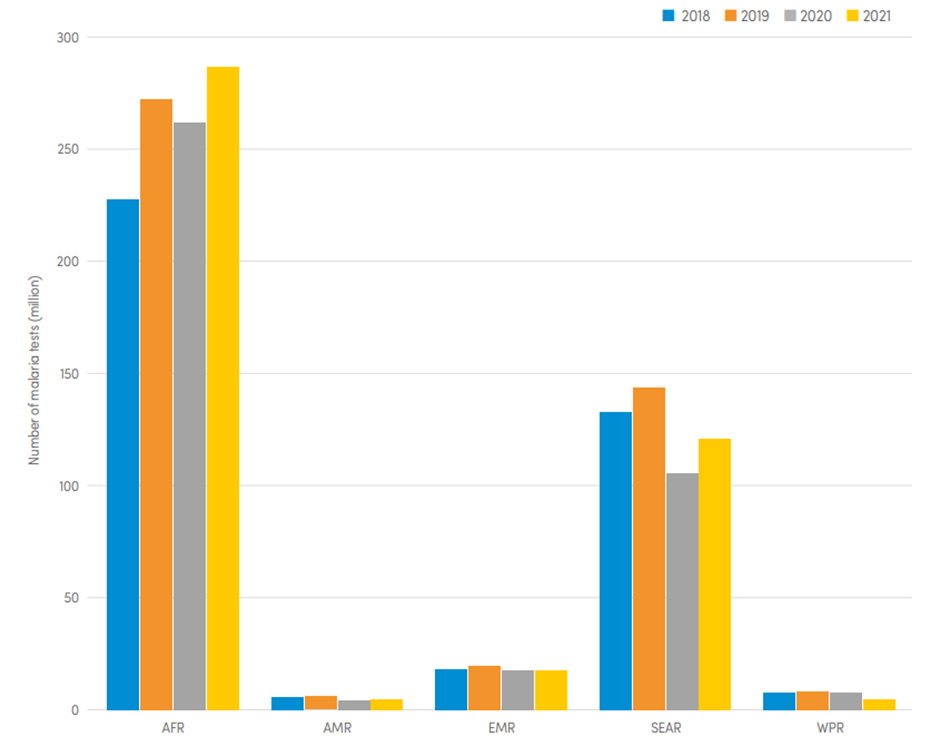
###### Number of Malaria tests conducted by WHO worldwide (WHO,2022)


A person is diagnosed with a case of severe malaria if asexual Plasmodium falciparum, a deadly parasite, is found in the peripheral blood smear or verified by a quick diagnostic test. The symptoms include impaired consciousness, respiratory distress, multiple convulsions, prostration, shock, pulmonary edema, abnormal bleeding, jaundice, severe anemia, hypoglycemia, acidosis, hyperlactatemia, renal impairment, or hyperparasitemia (Sypniewska et al., 2017).

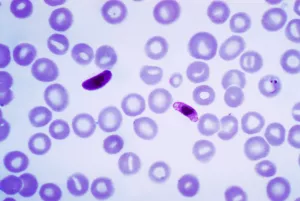
######  Plasmodium falciparum

With the recent advancement in the field of machine learning and artificial intelligence with respect to medical domain, various machine learning algorithms are being used in the detection and diagnosis of various diseases. In case of malaria the detection of Plasmodium parasite is the first step towards the confirmation that the patient is having malaria. Once the presence of the parasite is confirmed the doctors can begin the diagnosis. The process of detection of malaria, initially was a labour intensive and time consuming process which required highly skilled microscopists. By examining digital images of blood smears and precisely identifying cells that are infected with malaria, machine learning algorithms can automate and improve this process.

## Exploratory Data Analysis And Pre-Processing

The first step in detecting malaria cells using machine learning algorithms is to acquire a large dataset of labelled blood smear images. These images consist of both infected and uninfected cells, with each cell labelled with the appropriate infection status. These datasets serve as training data for machine learning models.

The data set used for this project is https://www.kaggle.com/iarunava/cell-images-for-detecting-malaria

Let's first import all the libraries that we'll need in the project.

### Importing Libraries

In [1]:
import os # Used for Input/Output operations
import cv2 # CV stands for Computer vision. It enables the computer to visualize the data 
import warnings # For filtering warnings that may occur during program execution
import numpy as np # Machine Learning library
from PIL import Image # Used for Image processing
import seaborn as sns # Used to visualize the confusion matrix
from keras.utils import normalize # Performs Normalization to improve performance
from tensorflow.keras.models import Sequential # Creates a sequential machine learning model
from tensorflow.keras.callbacks import EarlyStopping # Stops the iteration to prevent over fitting
from tensorflow.keras.layers import Conv2D, Dense, Dropout, MaxPooling2D, Flatten # various layers of deep learning and machine learning algorithms
import matplotlib.pyplot as plt # Used for plotting visualizations of data
from sklearn.metrics import roc_curve, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import train_test_split # used to slipt the the dataset into testing and training data set
from sklearn.metrics import confusion_matrix 



### Exploration of Dataset And Pre-Processing

Now to import all the data from the data set and process it so as to make the data suitable to be fed to the machine learning model that will be made later on in the project.

Dataset size is  (10000, 150, 150)
Label size is  (10000,)


(-0.5, 149.5, 149.5, -0.5)

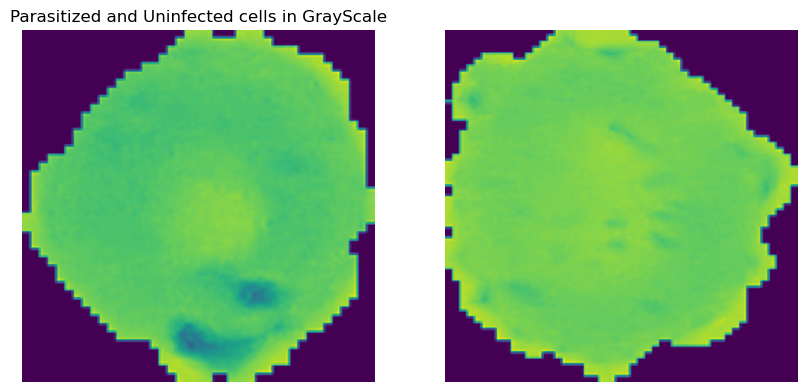

In [2]:

warnings.filterwarnings('ignore') # to ignore any warnings that might come in the code

img_dir= "cell_images/" # Image Directory
img_size= 150 # setting the image size so all the data can be of the same size
dataset = [] # image data
label = [] # lable used for classsification of Parasitized cells as 1 and Unparasitized cells as 0

parasite_imgs = os.listdir(img_dir + "Parasitized/")
for i, img_name in enumerate(parasite_imgs):
    
    if (img_name.split('.')[1] == 'png'):
        img = cv2.imread(img_dir + 'Parasitized/' + img_name, cv2.IMREAD_GRAYSCALE) #Reading the images as greyscale
        img = Image.fromarray(img)
        img = img.resize((img_size, img_size))
        demo_imgP = img
        dataset.append(np.array(img))
        label.append(1)
        
        
uninfected_imgs = os.listdir(img_dir + "Uninfected/")
for i, img_name in enumerate(uninfected_imgs):
    
    if (img_name.split('.')[1] == 'png'):
        img = cv2.imread(img_dir + 'Uninfected/' + img_name, cv2.IMREAD_GRAYSCALE) #Reading the images as greyscale
        img = Image.fromarray(img)
        img = img.resize((img_size, img_size))
        demo_imgU = img
        dataset.append(np.array(img))
        label.append(0)        
        
dataset = np.array(dataset) #converting the dataset to a numpy array
label = np.array(label)

#printing the data values for visualization
print("Dataset size is ", dataset.shape)
print("Label size is ", label.shape)
demo_imgP=np.asarray(demo_imgP)
demo_imgU=np.asarray(demo_imgU)
plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.imshow(demo_imgP)
plt.axis('off')
plt.title("Parasitized and Uninfected cells in GrayScale")
plt.subplot(1, 2, 2)
plt.imshow(demo_imgU)
plt.axis('off')


We imported the dataset and stored it into to arrays.
1. dataset [ ] = for storing all the image data
2. label [ ] = for storing the category to which the image belong to. 1 for Parasitized and 0 for Uninfected.

We also reshaped all the data, so they are all of the same size and also converted the data to greyscale to reduce data parameters, so it is easier to process the data. A sample of the data stored can be seen above.

### Splitting the DATA into Training and Testing data

Now we split the data into training and testing subsets. The training dataset will be used to train the model and the test dataset will be used to test how accurate the trained model is.

We will also be normalizing the datasets so that the weightage of both Parasitised cell class and Uninfected cell class be the same when used for training the model to avoid any biases. This significantly improves the model performance (Singh & Singh, 2020).

In [3]:

X_train, X_test, y_train, y_test = train_test_split(dataset, label, test_size = 0.2, random_state = 1234) # Splitting the data into training and testing data
print("Train size is ", X_train.shape)
print("Test size is ", X_test.shape)

#Normalizing the train and test data so the weight of each class is equal
X_train = normalize(X_train, axis=1) 
X_test = normalize(X_test, axis=1)

Train size is  (8000, 150, 150)
Test size is  (2000, 150, 150)


In [4]:
y_train.shape

(8000,)

### Building Deep Learning Models

Convolutional Neural Networks (CNNs) have proven to be powerful tools for image analysis tasks. Malaria cell detection is one such task, so we will be using a combination of CNNs and Dense layers or Fully Connected layers for building our deep learning models. 

Before we start building out our deep learning model, there are some terminologies that we must be aware of. The first being CNN. Convolutional Neural Networks (CNNs) can be defined as _"A convolutional neural network is a method of deep learning
that takes an input image and assigns importance (learnable biases and weights) to various
objects in the image, distinguishing one from the other"(Bhatt et al, 2021)._

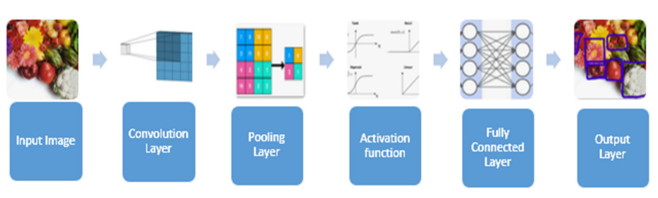
###### Components of a CNN (Bhatt et al, 2021)

Max pooling is a feature extraction layer. MaxPooling2D() is used to extract features from a matrix of 2x2 dimensions.

Dense Layer is a layer of neurons where every neuron is connected to the output of all the neurons of the previous layer, thus called as dense. Dense Layer is used to classify image based on output from convolutional layers_(Dumane, 2020)_.

Activation function is a non-linear function that is used to process the weighted average of the all the inputs of neurons.

Once built, we will be training both the models with the same train data and evaluate their performance on the same test data.

For this project we will be looking into two models of similar construct, but the number of hidden layers will vary. This will allow us to compare the relation between the model depth and the performance.

#### First Model

First Model is a sequential model which has a series of three convolutional neural networks the output of which is passed through max pooling layer at every stage. The end result of this structure is flattened and passed into a dense layer which then provides an output.

In [5]:
input = (img_size, img_size,1) 

#building a Model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=input, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation ='relu'))
model.add(Dropout(0.5)) # dropout disables few nuerons to prevent over fitting of performance
model.add(Dense(1, activation ='sigmoid'))
  
#Compiling the Model          
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) # usinng binary cross entropy because its a binary classification

#fitting the Model

callback = EarlyStopping(monitor='loss', patience=3) # utilising early stopping method to prevent over fitting by stopping the epochs as the loss function starts increasing

history = model.fit(X_train, y_train, batch_size = 50, validation_data=(X_test, y_test), verbose = 1, epochs = 20, callbacks=[callback])          
          


Epoch 1/20
160/160 [==============================] - 68s 420ms/step - loss: 0.6934 - accuracy: 0.5060 - val_loss: 0.6929 - val_accuracy: 0.5020
Epoch 2/20
160/160 [==============================] - 66s 410ms/step - loss: 0.6916 - accuracy: 0.5260 - val_loss: 0.6876 - val_accuracy: 0.5170
Epoch 3/20
160/160 [==============================] - 65s 403ms/step - loss: 0.6767 - accuracy: 0.5721 - val_loss: 0.6458 - val_accuracy: 0.6350
Epoch 4/20
160/160 [==============================] - 64s 398ms/step - loss: 0.6408 - accuracy: 0.6231 - val_loss: 0.5961 - val_accuracy: 0.6725
Epoch 5/20
160/160 [==============================] - 66s 413ms/step - loss: 0.5347 - accuracy: 0.7330 - val_loss: 0.4150 - val_accuracy: 0.8210
Epoch 6/20
160/160 [==============================] - 67s 418ms/step - loss: 0.3634 - accuracy: 0.8553 - val_loss: 0.3441 - val_accuracy: 0.8785
Epoch 7/20
160/160 [==============================] - 65s 408ms/step - loss: 0.2490 - accuracy: 0.9161 - val_loss: 0.2059 - val_ac

In [25]:
model.summary() # provides a visualization of the model functions and parameters of each layers

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

#### Visualizing the model metrics

Plotting  different graphs for visualization of the model performance.

Accuracy is calculated by total number of correct predictions out of total amount of data. 

        Accuracy = (TN+TP)/(TN+FP+TP+FN)

Precision is the number of correct classifications out of all the instances of the class of data.

        Precision = TP/(TP+FP)

Recall can be defined as the rate of true positives.

        Recall= TP/(TP+FN)

F1 Score is a metric that takes into consideration both precision and recall.

        F1 Score = 2 (Precision*Recall)/(Precision+Recall)


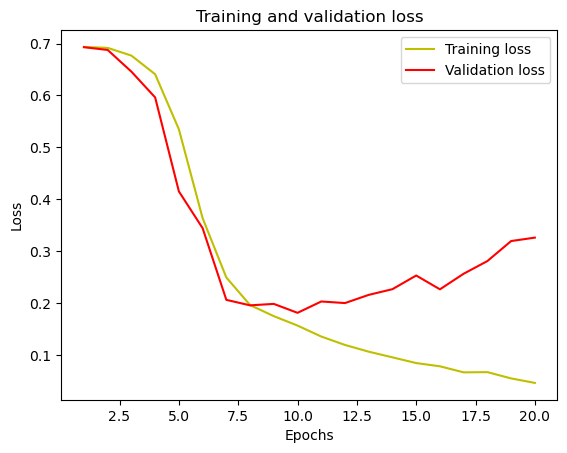

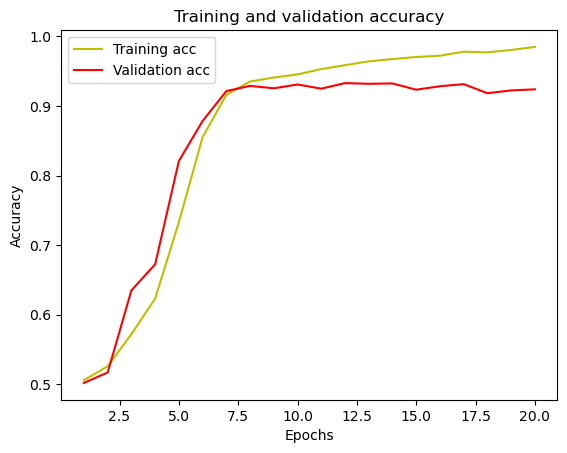

In [6]:
#plotting graph for loss per epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#Plotting graph for accuracy per epoch
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()




In [7]:
mythreshold=0.785 # threshold for rounding off the prediction value to the nearest integer
y_pred_M1=(model.predict(X_test)>= mythreshold).astype(int) 
print(classification_report(y_test, y_pred_M1))

63/63 [==============================] - 4s 54ms/step
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       996
           1       0.96      0.88      0.92      1004

    accuracy                           0.93      2000
   macro avg       0.93      0.93      0.92      2000
weighted avg       0.93      0.93      0.92      2000



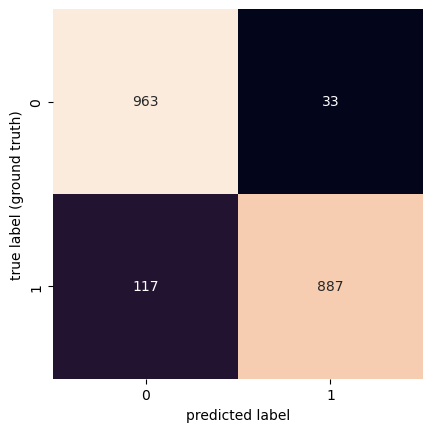

In [8]:
cm=confusion_matrix(y_test, y_pred_M1) 
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('predicted label')
plt.ylabel('true label (ground truth)')
plt.show()

###### Confusion Matrix
A confusion matrix is a table that is used to represent the performance of any classification model on a set of data for which the true values are known or in other words for labelled dataset. It is a 2x2 matrix for binary classification _(Shrivastav, 2023)_.

It represents - 
   TP (True Positive) : The data instances that the model predicted as positive or the positive class, and the ground truth for that instance is also positive.
   
   TN (True Negative) : The data instances that the model predicted as negative or the negative class, and the ground truth for that instance is also negative.
   
   FP (False Positive) : The data instances that the model predicted as positive or the positive class, but the ground truth for that instance is negative.
   
   FN (False Negative) : The data instances that the model predicted as negative or the negative class, but the ground truth for that instance is positive.


63/63 [==============================] - 4s 57ms/step


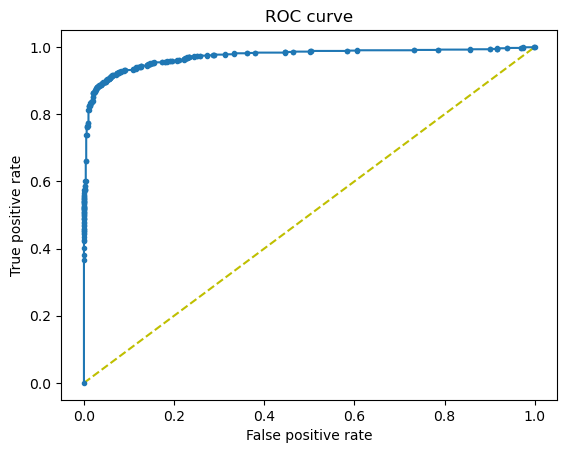

In [9]:
y_preds = model.predict(X_test).ravel() # returns a contiguous 1D array

fpr, tpr, thresholds = roc_curve(y_test, y_preds)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'y--')
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()


###### ROC curve

ROC stands for Receiver Operating Character. It is a graph that shows the performance of the classification model at all the classification thresholds.

It is based on two parameters.

    True Positive Rate = TP/(TP+FN)
    False Positive Rate = FP/(FP+TN)

In [10]:
print( 'Precision is : %.2f%%' % (precision_score(y_test, y_pred_M1) * 100))


Precision is : 96.41%


In [11]:
print( 'Recall Score is : %.2f%%' % (recall_score(y_test, y_pred_M1) * 100))


Recall Score is : 88.35%


In [12]:
print( 'F1 Score is : %.2f%%' % (f1_score(y_test, y_pred_M1) * 100))


F1 Score is : 92.20%


###### An example of the model classifying the input image. 

1/1 [==============================] - 0s 38ms/step
The prediction for this image is:  [[0.9999802]]
The actual label for this image is:  1


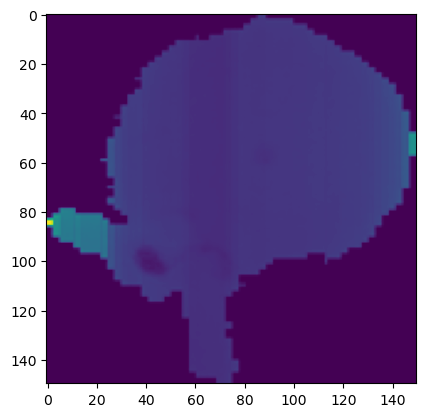

In [13]:
n=588  #Select the index of image to be loaded for testing
img = X_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
print("The prediction for this image is: ", model.predict(input_img))
print("The actual label for this image is: ", y_test[n])

#### Second Model

The second model is a stepped down version of the first one. It has lesser number of layer but more numbers of input nodes than the first one.

The first layer is a convolutional layer with 64 input nodes, the output of which is passed into a max pooling layer and then flattened and fed into a fully connected layer with 50% dropout and finally into the classifier.

Theoretically it should be faster than the first model and should have lesser accuracy since all the other inputs have been kept the same.


In [15]:
input = (img_size, img_size,1)

#building the Model
model2 = Sequential()
model2.add(Conv2D(64, kernel_size=(3, 3), input_shape=input, activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Flatten())
model2.add(Dense(64, activation ='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(1, activation ='sigmoid'))
  
#Compiling the Model          
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


history2 = model2.fit(X_train, y_train, batch_size = 50, validation_data=(X_test, y_test), verbose = 1, epochs = 20, callbacks=[callback])          
          


Epoch 1/20
160/160 [==============================] - 114s 705ms/step - loss: 0.7097 - accuracy: 0.5207 - val_loss: 0.6863 - val_accuracy: 0.5555
Epoch 2/20
160/160 [==============================] - 110s 688ms/step - loss: 0.6679 - accuracy: 0.5904 - val_loss: 0.6612 - val_accuracy: 0.5975
Epoch 3/20
160/160 [==============================] - 116s 722ms/step - loss: 0.6197 - accuracy: 0.6620 - val_loss: 0.6463 - val_accuracy: 0.6235
Epoch 4/20
160/160 [==============================] - 113s 707ms/step - loss: 0.5661 - accuracy: 0.7067 - val_loss: 0.6434 - val_accuracy: 0.6220
Epoch 5/20
160/160 [==============================] - 109s 684ms/step - loss: 0.5142 - accuracy: 0.7445 - val_loss: 0.6585 - val_accuracy: 0.6280
Epoch 6/20
160/160 [==============================] - 112s 701ms/step - loss: 0.4623 - accuracy: 0.7862 - val_loss: 0.6750 - val_accuracy: 0.6235
Epoch 7/20
160/160 [==============================] - 115s 722ms/step - loss: 0.4015 - accuracy: 0.8254 - val_loss: 0.6984 -

In [26]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 64)      640       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 64)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 350464)            0         
                                                                 
 dense_4 (Dense)             (None, 64)                22429760  
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                      

Surprisingly, the smaller model generates more trainable parameters than the 1st model, on the same input. Hence it is slower in comparison to its counterpart the 1st model.

This can be due to the fact the second model has more initial inputs in the 1st layer.

#### Visualizing the model metrics

Plotting different graphs to visualize the performance of the second model, so a comparison can be done.

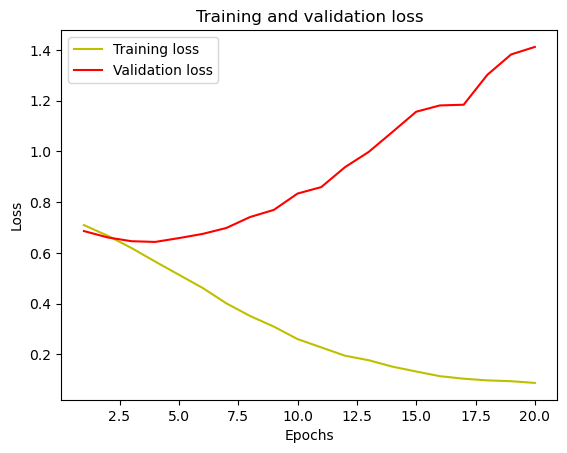

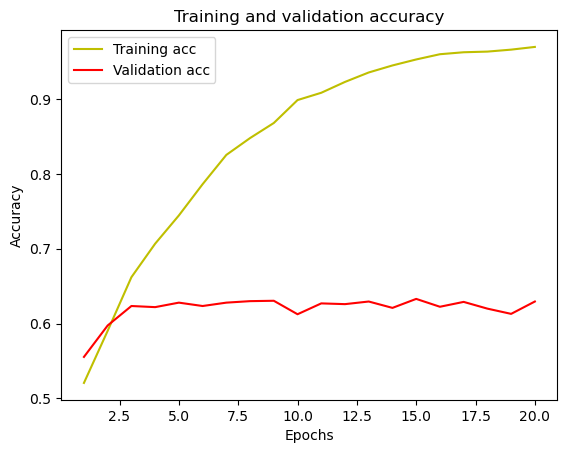

In [16]:
#plotting graph for loss per epoch
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']
epochs2 = range(1, len(loss) + 1)
plt.plot(epochs2, loss2, 'y', label='Training loss')
plt.plot(epochs2, val_loss2, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#Plotting graph for accuracy per epoch
acc2 = history2.history['accuracy']
val_acc2 = history2.history['val_accuracy']
plt.plot(epochs2, acc2, 'y', label='Training acc')
plt.plot(epochs2, val_acc2, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

###### Observation
The accuracy and loss function are aggressively over fitting.


In [17]:
mythreshold=0.785
y_pred_M2=(model2.predict(X_test)>= mythreshold).astype(int)
print(classification_report(y_test, y_pred_M2))

63/63 [==============================] - 6s 95ms/step
              precision    recall  f1-score   support

           0       0.59      0.72      0.65       996
           1       0.64      0.51      0.57      1004

    accuracy                           0.61      2000
   macro avg       0.62      0.61      0.61      2000
weighted avg       0.62      0.61      0.61      2000



The classification report for the second model shows slower speed and lower performance.

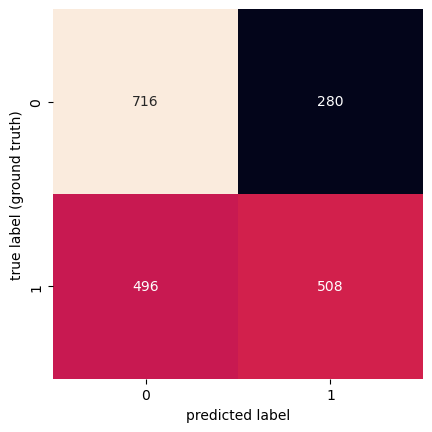

In [18]:
cm2=confusion_matrix(y_test, y_pred_M2)  
sns.heatmap(cm2, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('predicted label')
plt.ylabel('true label (ground truth)')
plt.show()

###### Confusion Matrix

The Confusion matrix shows that the model is being biased towards the first class i.e., Parasitized, hence it is predicting that most of its inputs belong to the first class.

This can be due to data imbalance or could be because faulty pre processing  of data.

63/63 [==============================] - 6s 95ms/step


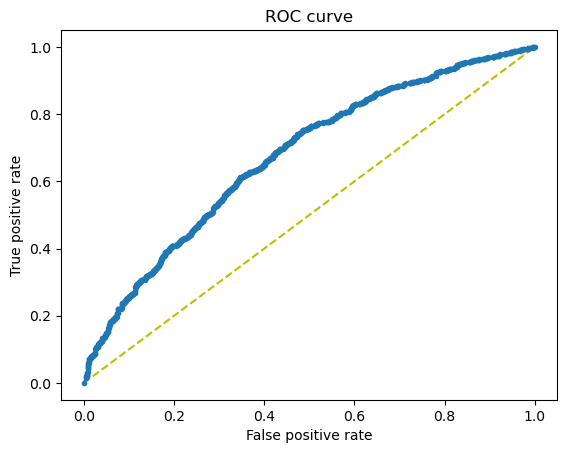

In [19]:
y_preds2 = model2.predict(X_test).ravel()

fpr, tpr, thresholds = roc_curve(y_test, y_preds2)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'y--')
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()

###### ROC curve

The ROC curve shows a significant drop in the performance of the second model when compared to that of the first model where the graph showed there was much more accurate predictions, since the first model has better performance. 

In [20]:
print( 'Precision is : %.2f%%' % (precision_score(y_test, y_pred_M2) * 100))


Precision is : 64.47%


In [21]:
print( 'Recall Score is : %.2f%%' % (recall_score(y_test, y_pred_M2) * 100))

Recall Score is : 50.60%


In [22]:
print( 'F1 Score is : %.2f%%' % (f1_score(y_test, y_pred_M2) * 100))

F1 Score is : 56.70%


Other performance metrics components also show a significant drop in performance like Precision, Recall and F1 Score.

                 Model 1                        Model 2
                 
    Precision    96.41%                         64.4%
    Recall       88.35%                        50.60%
    F1 Score     92.20%                        56.70%

###### An example of the model classifying the input image. 

1/1 [==============================] - 0s 42ms/step
The prediction for this image is:  [[0.9563299]]
The actual label for this image is:  1


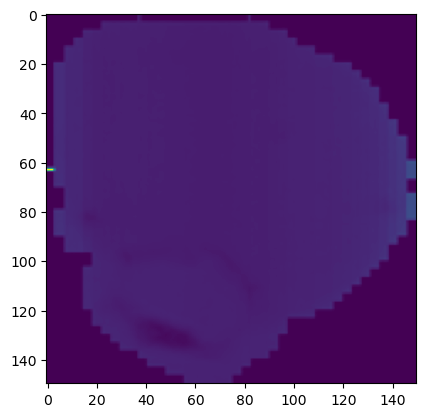

In [23]:
n=256  #Select the index of image to be loaded for testing
img = X_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
print("The prediction for this image is: ", model2.predict(input_img))
print("The actual label for this image is: ", y_test[n])

### Conclusion

It is worth knowing that deep learning algorithms should not replace traditional diagnostic methods, but rather complement them. Manual inspection by experienced microscopists is still crucial to confirm and validate automated predictions. Machine learning-based systems can be a valuable screening tool. They can be used for reporting suspicious cases for further investigation by healthcare professionals.

To conclude, the use of deep learning models in malaria detection or in any other aspect of medical field, can bring forth a breakthrough in the sector. The algorithms can be trained to accurately identify parasitic cells, which without the use of machine learning, takes a significant amount of time and human expertise to detect and identify. Involving deep learning algorithms can automate the analysis of blood samples, significantly reducing the current time and effort needed to complete the process, which will in turn allow the patients to get a quicker diagnosis.


### References

WHO, . (2022) World malaria report 2022, World Health Organization. Available at: https://www.who.int/teams/global-malaria-programme/reports/world-malaria-report-2022 (Accessed: 15 May 2023). 

Conroy, A.L., Datta, D. and John, C.C. (2019) ‘What causes severe malaria and its complications in children? lessons learned over the past 15 years’, BMC Medicine, 17(1). doi:10.1186/s12916-019-1291-z. 

Talapko, J. et al. (2019) ‘Malaria: The past and the present’, Microorganisms, 7(6), p. 179. doi:10.3390/microorganisms7060179. 

Sypniewska, P. et al. (2017) ‘Clinical and laboratory predictors of death in African children with features of severe malaria: A systematic review and meta-analysis’, BMC Medicine, 15(1). doi:10.1186/s12916-017-0906-5. 

Singh, D. and Singh, B. (2020) ‘Investigating the impact of data normalization on classification performance’, Applied Soft Computing, 97, p. 105524. doi:10.1016/j.asoc.2019.105524. 

Bhatt, D. et al. (2021) ‘CNN variants for Computer Vision: History, architecture, application, challenges and future scope’, Electronics, 10(20), p. 2470. doi:10.3390/electronics10202470. 

Dumane, G. (2020) Introduction to convolutional neural network (CNN) using tensorflow, Medium. Available at: https://towardsdatascience.com/introduction-to-convolutional-neural-network-cnn-de73f69c5b83#:~:text=Dense%20Layer%20is%20simple%20layer,Working%20of%20single%20neuron. (Accessed: 15 May 2023). 

Shrivastav, S. (2023) All about confusion matrix- preparing for interview questions, Medium. Available at: https://medium.com/@shivang-ahd/all-about-confusion-matrix-preparing-for-interview-questions-fddea115a7ee (Accessed: 15 May 2023). 
